In [1]:
%matplotlib inline

# Introduction

In the years proceeding [Dunham _et. al._ (2008)](https://ui.adsabs.harvard.edu/abs/2008ApJS..179..249D/abstract), we've observed astronomers misuse the original 70 micron correlation, widely applying it to non-class 0 protostars. Hence, in this notebook, we aim to quantify the error introduced should one use the fit presented in [Dunham _et. al._ (2008)](https://ui.adsabs.harvard.edu/abs/2008ApJS..179..249D/abstract), instead of our own. For clarity, we'll refer to the original fit as `dfit` (a.k.a. Dunham's fit), and the updated fit as `yfit` (a.k.a. Yek's fit).

# Import Dependencies

In [2]:
# System & OS
import warnings
warnings.filterwarnings('ignore')

# Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('whitegrid')      # background
plt.rc('figure', titlesize=24)  # figure title 
plt.rc('axes', titlesize=18)    # axes title
plt.rc('axes', labelsize=18)    # xy labels
plt.rc('xtick', labelsize=14)   # x tick labels
plt.rc('ytick', labelsize=14)   # y tick labels
plt.rc('legend', fontsize=14)   # legend

# Mount Storage

`cd` to the `data/` directory.

In [3]:
%cd '../data/'

/Users/zach/Documents/Projects/Protostellar-Luminosity/data


# Feature Engineering

Read in our results from `2_linear_regression.ipynb`, only selecting the data closest to 70 microns.

In [4]:
# Read in linear coefficients
coef = pd.read_csv('lin_coef.csv', skiprows=1, names=['Class', 
                                                      'Wavelength (microns)', 
                                                      'Slope', 
                                                      'Unc_slope', 
                                                      'Intercept', 
                                                      'Unc_intercept'])
# Read in correlation metrics
corr = pd.read_csv('corr_coef.csv', skiprows=1, names=['Class', 
                                                       'Wavelength (microns)', 
                                                       'Reduced chi-squared (linear space)', 
                                                       'Reduced chi-squared (log10 space)', 
                                                       'Correlation coefficient (linear space)', 
                                                       'Correlation coefficient (log10 space)'])

# Merge the two dataframes along the class and wavelength columns
df = pd.merge(coef, corr, on=['Class', 'Wavelength (microns)'])
# Drop the rows with all wavelengths
df.drop(index=[400, 401, 402, 403], inplace=True)
# Typecast wavelength column to float
df['Wavelength (microns)'] = df['Wavelength (microns)'].apply(lambda x: float(x))
# Retrive rows with wavelength closest to 70 microns
df = df[np.isclose(df['Wavelength (microns)'], 7.35706025e+01)]
df

,Class,Wavelength (microns),Slope,Unc_slope,Intercept,Unc_intercept,Reduced chi-squared (linear space),Reduced chi-squared (log10 space),Correlation coefficient (linear space),Correlation coefficient (log10 space)
104,0,73.570602,0.991177,0.001600,-9.123577,0.002088,nan,-28.963521,0.919712,0.982471
105,1a,73.570602,1.051372,0.002000,-9.460327,0.002296,nan,-165.302103,0.856317,0.945712
106,1b,73.570602,1.022947,0.001951,-9.593142,0.001472,nan,-127.579043,0.965017,0.945657
107,All,73.570602,1.107987,0.001333,-9.520574,0.001383,nan,-514.076791,0.797523,0.947305


Also load the results from `1_model_analysis.ipynb` closest to 70 microns.

In [5]:
ndarray = np.load('70_micron_data.npy', allow_pickle=True)
data = pd.DataFrame(ndarray, columns=['Class', 'Wavelength (microns)', 'Flux', 'L_int'])
data

,Class,Wavelength (microns),Flux,L_int
0,0,73.570602,0.0,2.0869
1,0,73.570602,0.0,2.0869
2,0,73.570602,0.0,2.0869
3,0,73.570602,0.0,2.0869
4,0,73.570602,0.0,2.0869
...,...,...,...,...
78960,1b,73.570602,0.0,5.9644
78961,1b,73.570602,0.0,5.9644
78962,1b,73.570602,0.0,5.9644
78963,1b,73.570602,0.0,5.9644


# Data Analysis

Visualize the luminosity values predicted by `dfit` and `yfit`, respectively, as a function of the model flux values at 70 microns, denoted $F_{70}$, for class 0, 1a, and 1b objects. Note, since `dfit` was only tested against class 0 protostars, we'll use the same parameters (`m = 1.06`, `b = -9.02`) for all three classes.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


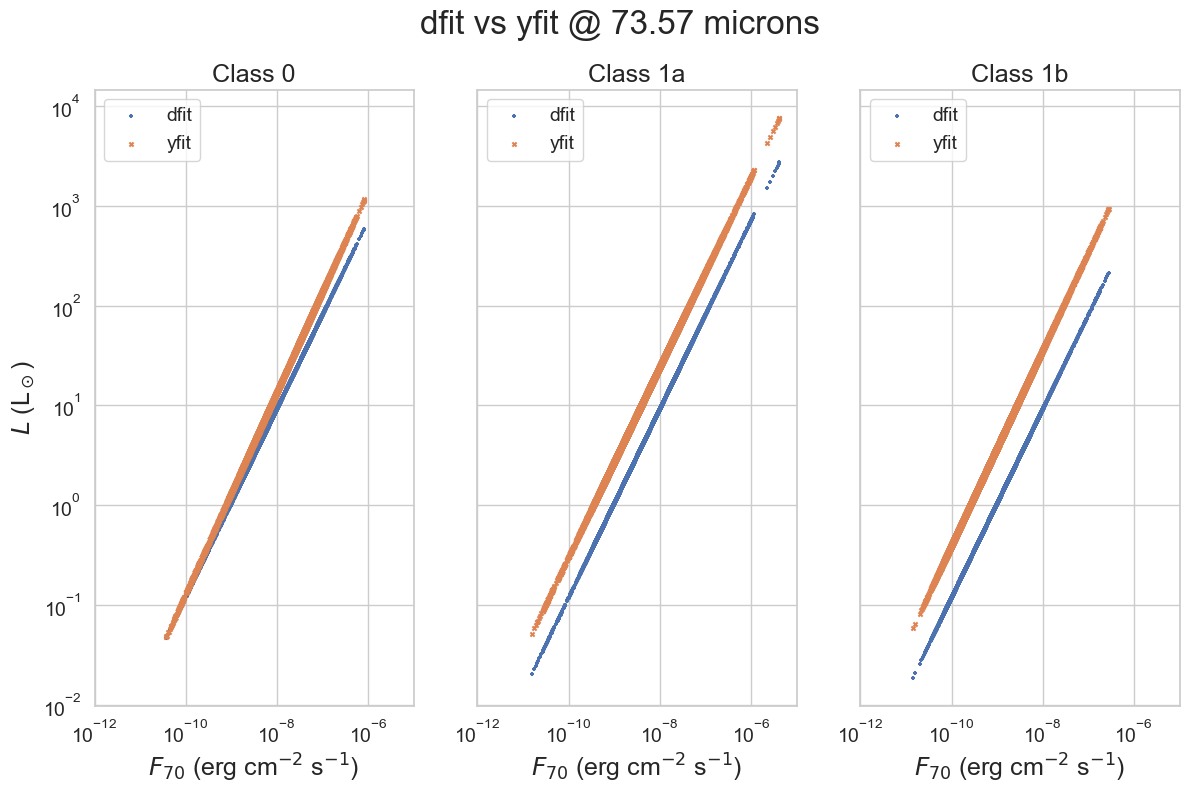

In [6]:
# Create 3-figure plot
fig, ax = plt.subplots(1, 3, figsize=(14, 8), sharey=True)
# Set title
fig.suptitle('dfit vs yfit @ 73.57 microns')
# Customize shared y-axis
ax[0].set_ylabel('$L$ (L$_\odot$)')
ax[0].set_yscale('log')
# Map class name to subplot position
class_map = {'0': 0, '1a': 1, '1b': 2}
for class_name in class_map:
    # Extract model flux data for this class
    x = data[data['Class'] == class_name]['Flux']
    # Compute predicted luminosity from dfit
    m, b = 1.06, -9.02
    dfit = x**(1 / m) * 10**(-b / m)
    # Compute predicted luminosity from yfit
    m, b = df[df['Class'] == class_name]['Slope'].values[0], df[df['Class'] == class_name]['Intercept'].values[0]
    yfit = x**(1 / m) * 10**(-b / m)
    # Plot data
    index = class_map[class_name]
    ax[index].scatter(x, dfit, s=9, marker='+')
    ax[index].scatter(x, yfit, s=9, marker='x')
    # Customize subplot
    ax[index].set_title(f'Class {class_name}')
    ax[index].set_xlabel('$F_{70}$ (erg cm$^{-2}$ s$^{-1}$)')
    ax[index].set_xscale('log')
    ax[index].set_xlim([1e-12, 1e-5])
    # Add legend
    ax[index].legend(['dfit', 'yfit'], loc='upper left')
# Save figure
plt.savefig(f'Figures/dfit_vs_yfit.eps', format='eps', dpi=1200)
plt.savefig(f'../src/images/dfit_vs_yfit.jpg', format='jpg')
plt.show()

We then compute the percent error introduced by using `dfit` as opposed to `yfit` as
$$
\begin{equation*}
\text{Percent Error}=\frac{\left|L_\text{yfit}-L_\text{dfit}\right|}{L_\text{yfit}}\times100\%\end{equation*}
$$

2.7850863060972384 49.487375777986315
60.64060898860261 64.27233499333987
68.21631581134035 77.32703226962082


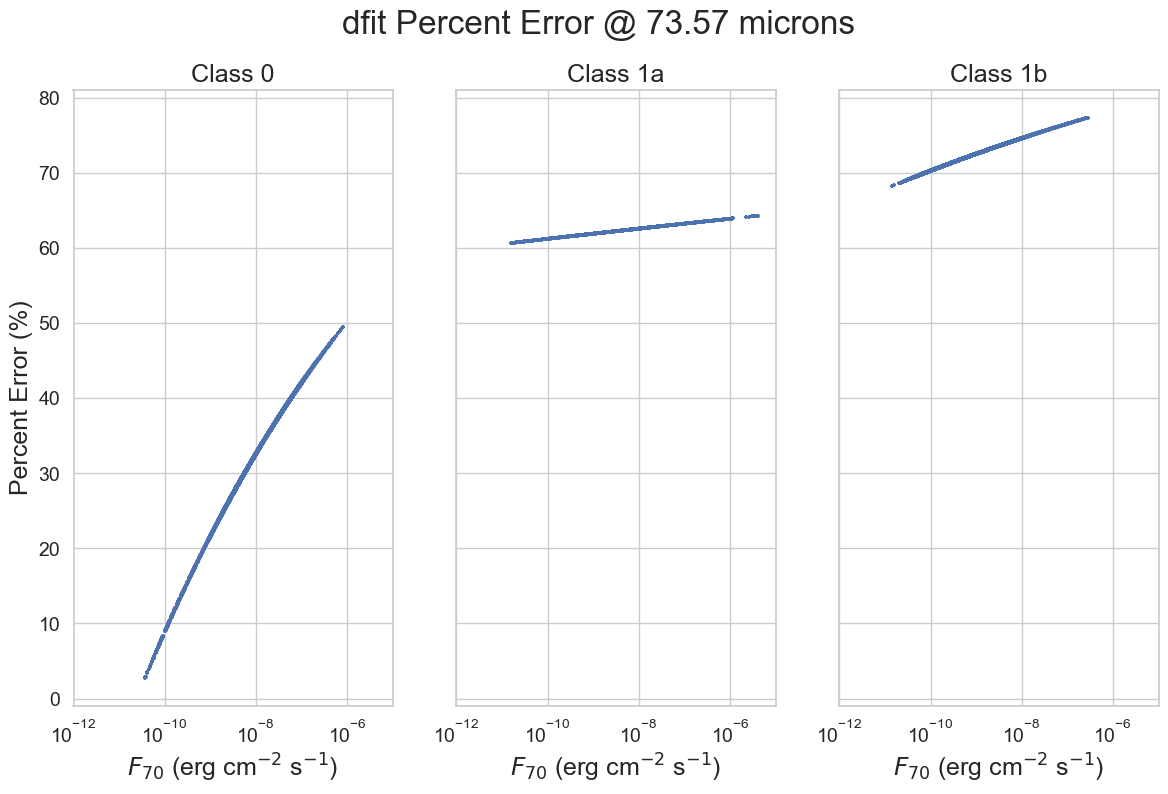

In [7]:
# Create 3-figure plot
fig, ax = plt.subplots(1, 3, figsize=(14, 8), sharey=True)
# Set title
fig.suptitle('dfit Percent Error @ 73.57 microns')
# Customize shared y-axis
ax[0].set_ylabel('Percent Error (%)')
# Map class name to subplot position
class_map = {'0': 0, '1a': 1, '1b': 2}
for class_name in class_map:
    # Extract model flux data for this class
    x = data[data['Class'] == class_name]['Flux']
    # Compute predicted luminosity from dfit
    m, b = 1.06, -9.02
    dfit = x**(1 / m) * 10**(-b / m)
    # Compute predicted luminosity from yfit
    m, b = df[df['Class'] == class_name]['Slope'].values[0], df[df['Class'] == class_name]['Intercept'].values[0]
    yfit = x**(1 / m) * 10**(-b / m)
    # Calculate percent error
    error = abs(yfit - dfit) / yfit * 100
    # Print min and max error
    print(error.min(), error.max())
    # Plot data
    index = class_map[class_name]
    ax[index].scatter(x, error, s=9, marker='+')
    # Customize subplot
    ax[index].set_title(f'Class {class_name}')
    ax[index].set_xlabel('$F_{70}$ (erg cm$^{-2}$ s$^{-1}$)')
    ax[index].set_xscale('log')
    ax[index].set_xlim([1e-12, 1e-5])
# Save figure
plt.savefig(f'Figures/dfit_error.eps', format='eps', dpi=1200)
plt.savefig(f'../src/images/dfit_error.jpg', format='jpg')
plt.show()

Therefore, we conclude that for class 0 objects, `dfit` underpredicts* by roughly `2% - 50%`; roughly `60% - 65%` for class 1a objects; roughly `68% - 78%` for class 1b objects (all w.r.t. `yfit`).

*`dfit` < `yfit` for all values of $F_{70}$

Out of curiosity, let's compute the error introduced by using `yfit` at class 0 for non-class 0 objects. In other words,
$$
\begin{equation*}
\frac{\left|L_\text{yfit, 1 or 2}-L_\text{yfit, 0}\right|}{L_\text{yfit, 1 or 2}}\times100\%\end{equation*}
$$

21.300839834317994 61.78127324354323
58.175706835289745 69.31597624733207


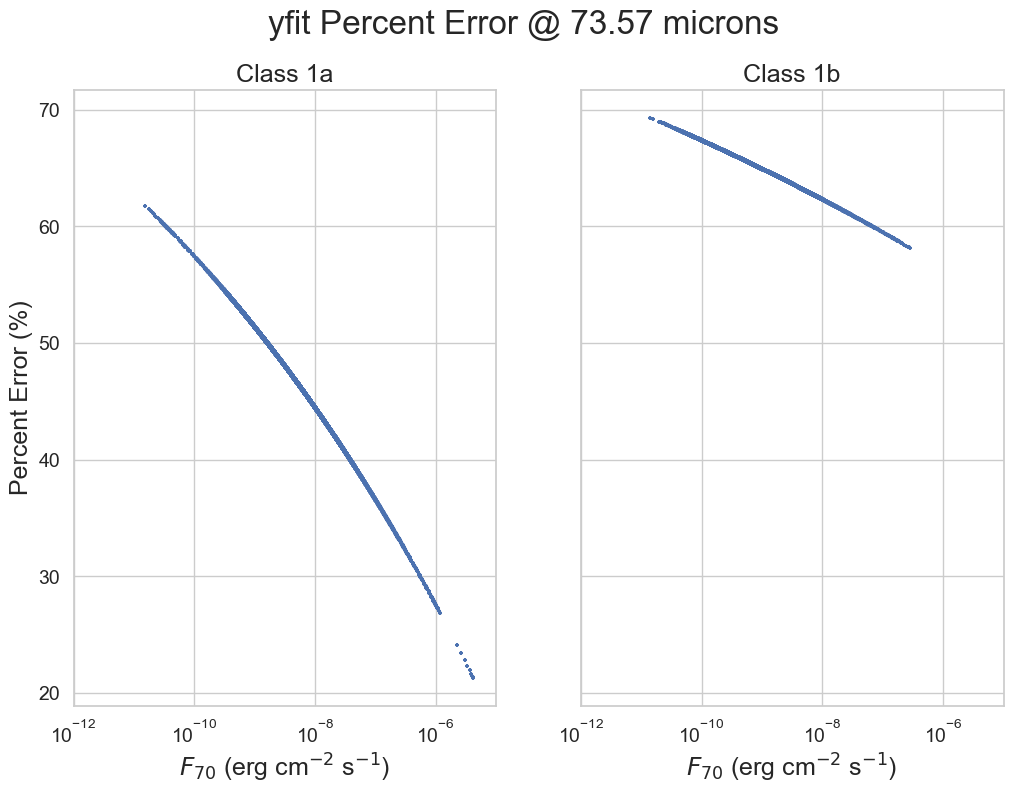

In [8]:
# Create 2-figure plot
fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
# Set title
fig.suptitle('yfit Percent Error @ 73.57 microns')
# Customize shared y-axis
ax[0].set_ylabel('Percent Error (%)')
# Map class name to subplot position
class_map = {'1a': 0, '1b': 1}
for class_name in class_map:
    # Extract model flux data for this class
    x = data[data['Class'] == class_name]['Flux']
    # Extract linear coefficients for this class
    m, b = df[df['Class'] == class_name]['Slope'].values[0], df[df['Class'] == class_name]['Intercept'].values[0]
    # Compute predicted luminosity from yfit
    yfit = x**(1 / m) * 10**(-b / m)
    # Compute predicted luminosity from yfit @ class 0
    m_0, b_0 = df[df['Class'] == '0']['Slope'].values[0], df[df['Class'] == '0']['Intercept'].values[0]
    yfit_0 = x**(1 / m_0) * 10**(-b_0 / m_0)
    # Calculate percent error
    error = abs(yfit - yfit_0) / yfit * 100
    # Print min and max error
    print(error.min(), error.max())
    # Plot data
    index = class_map[class_name]
    ax[index].scatter(x, error, s=9, marker='+')
    # Customize subplot
    ax[index].set_title(f'Class {class_name}')
    ax[index].set_xlabel('$F_{70}$ (erg cm$^{-2}$ s$^{-1}$)')
    ax[index].set_xscale('log')
    ax[index].set_xlim([1e-12, 1e-5])
# Save figure
plt.savefig(f'Figures/yfit_error.eps', format='eps', dpi=1200)
plt.savefig(f'../src/images/yfit_error.jpg', format='jpg')
plt.show()

Thus, `yfit` at class 0 underpredicts by roughly `21% - 62%` for class 1a objects, and `58% - 70%` for class 1b objects.